# Hypothesis Testing Exercises

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env

In [2]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

In [52]:


!ipython profile locate default



/Users/christopherortiz/.ipython/profile_default


## Hypothesis Testing: A Simulation Based Approach
__Example__: Codeup produced a scratch off lottery ticket called "Golden Gitty-Up". The odds of winning are advertised to the state of Texas.
> If Codeup produced the tickets they know how many tickets are 'winners' and how many are 'losers'

__Theory__: Our `population` is 1,000 tickets.

__Implementation__: Model the win/loss ratio using pandas Series
- 250 tickets -> Win
- 750 tickets -> Loss
- 25% chance of a 'Win' ticket
- 1 in 4 chance of a 'Win' ticket

### Probability of Win/Lose

The actual probability of winning is 25%


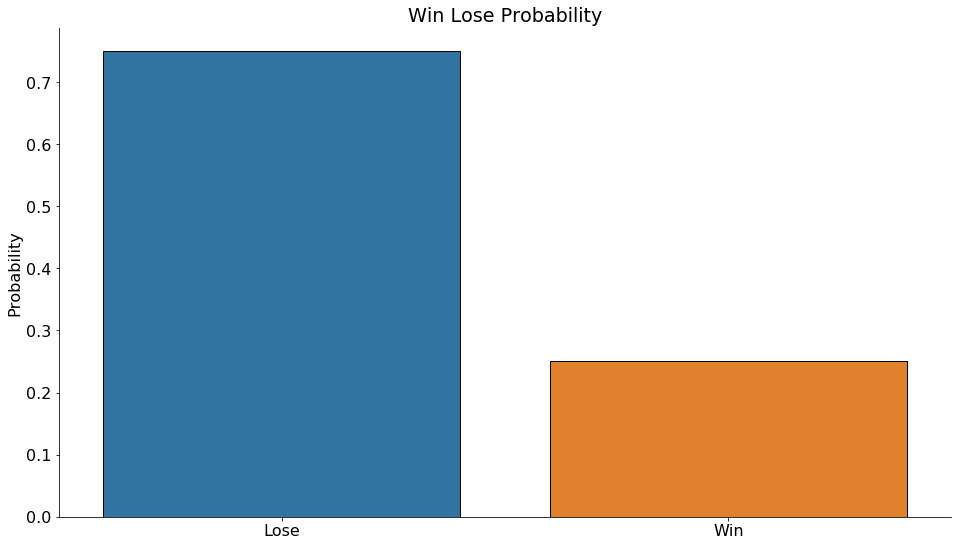

In [3]:
# Generate a series of 1000 True/False values to represent the Golden Gitty-Up
# win-loss probability.
tickets = pd.Series([True] * 250 + [False] * 750)


print('The actual probability of winning is {:.0%}'.format(tickets.mean()))

# Visualize the win loss probability.
sns.barplot(y=tickets.value_counts(normalize=True), x=['Lose', 'Win'])

# Format chart with labels.
plt.title('Win Lose Probability')
plt.ylabel('Probability');

### Create a Sample

__Scenario__:

The "Golden Gitty-Ups" were distributed to the town of Bronte, Texas, population 999. Jack Kerouac is dropped into town, receiving the last ticket.

__Theory__:

Take a random `sample` [__BORING__ Google Talk] and calculate the win rate.
> We won't see a win-rate of exactly 25% for each sample. A sample is a piece of the population. A piece of the glory.

__Implementation__:

Use `pd.sample` to randomly choose 25 tickets, representing 25 Brontenites. Use `pd.mean` to calculate win rate of the sample.

In [4]:
# A sample of the population is 25 out of 1,000 citizens.
citizens = 25
sample_mean = tickets.sample(citizens).mean()

print("Sample mean win-rate {:.2%}".format(sample_mean))

Sample mean win-rate 28.00%


### Generating Random Samples
__Scenario__:

Each citizen in Bronte, Texas in is given a "Golden Gitty-Up".

__Theory__:

Each street is a portion of the population, 25 citizens each. The win rate, again, will not be exactly 25%.

__Implementation__:

Let's take a sample of one street.

In [5]:
# this is a list comprehension that takes 5 random samples of 25 tickets.
[tickets.sample(citizens).mean() for _ in range(5)]

[0.24, 0.16, 0.16, 0.08, 0.2]

### Simulate $n$ Samples
__Theory__:

Let's repeat this experiment 10,000 times.
> Win rates are expected to be normally distributed.

__Implementation__:

Simulate 10,000 win-loss probabilities of a sample of our population.

Average win-loss probability of 10,000 samples is 24.93%


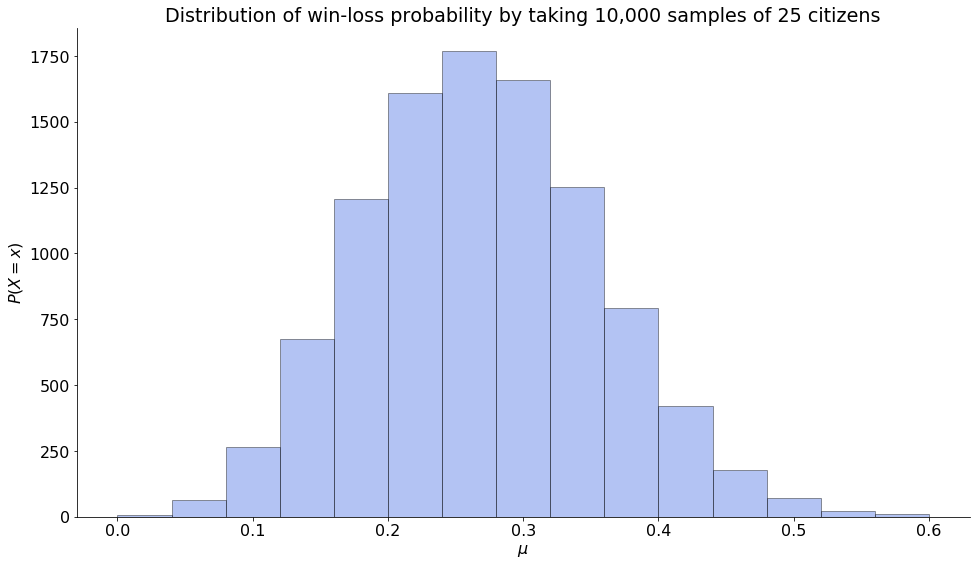

In [6]:
# Use `stats.binom` to simulate wins as 1 and losses as 0.
# Set `p` kwarg to .25 -> The probability of winning.
win_loss_rates = stats.binom(n=1, p= 0.25).rvs((10_000, 25)) # 25 citizens per sample
average_win_rate = win_loss_rates.mean()

# Answer:
print("Average win-loss probability of 10,000 samples is {:.2%}".format(average_win_rate))

# Calcalate and plot the mean win rate for 10,000 trials.
sns.distplot(win_loss_rates.mean(axis=1),
             bins=15,
             kde=False,
             color='Royalblue')

# Chart labels to describe the data.
plt.title("Distribution of win-loss probability by taking 10,000 samples of 25 citizens")
plt.xlabel('$\mu$')
plt.ylabel('$P(X=x)$');

In [7]:
# simulation of 10,000 win-loss probabilities

# Inside pd.Series, tickets.sample(citizens).mean() calculates the mean win rate of a single
# sample/simulation. 'for _ in range(10_000)' simulates 10,000 samples of a street's win-rate.
# calculated_winrates = pd.Series([tickets.sample(citizens).mean() for _ in range(10_000)])

# sns.distplot(calculated_winrates,bins=15)
# plt.title("Win-rate distribution of taking 10,000 samples from 25 citizens");

# Central Limit Theory

__Theory__:

The __Central Limit Theorem__ will be normally distributed even if the underlying random variable __*is not*__.

## 1.
>Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.

In [8]:
# In order to create a matrix of all possible outcomes from rolling a pair of dice
# I'll need to use Numpy and broadcast the combinations into a matrix.
die_1 = np.array([1,2,3,4,5,6]).reshape(-1, 1) # reshape
die_2 = np.array([1,2,3,4,5,6])

# Add vectors together to generate a Numpy array.
dice = die_1 + die_2
number_of_outcomes = 36  # Number of outcomes from rolling a pair of dice.

# Calculate the expected mean value.
expected_value = (dice / number_of_outcomes).sum()

# Answer:
print("Expected mean value of 6 dice rolls is {:.2f}".format(
    expected_value)
     )

Expected mean value of 6 dice rolls is 7.00


In [9]:
# Create a pandas dataframe to relabel index and columns as sides of a die
dice_outcomes = pd.DataFrame(
    dice,
    index=np.arange(1,7),
    columns=np.arange(1,7)
)

print("\nAll possible outcomes of rolling a pair of dice:")
dice_outcomes


All possible outcomes of rolling a pair of dice:


,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [10]:
# Create a probability table of rolling a certain outcome
dice_probability = pd.DataFrame(
    dice_outcomes.stack().value_counts().sort_index(),
    columns = ['#_of_possible_outcomes']
).rename_axis(index='outcome')

# Create a new column with the probability of a certain outcome
dice_probability['probability'] = dice_probability / 36

# Display dice data
print("\nProbabilities of rolling a certain value:")
round(dice_probability, 3)  # I guess 7's are 'lucky'...


Probabilities of rolling a certain value:


,#_of_possible_outcomes,probability
outcome,,
2,1,0.028
3,2,0.056
4,3,0.083
5,4,0.111
6,5,0.139
7,6,0.167
8,5,0.139
9,4,0.111
10,3,0.083


It's normally distributed!


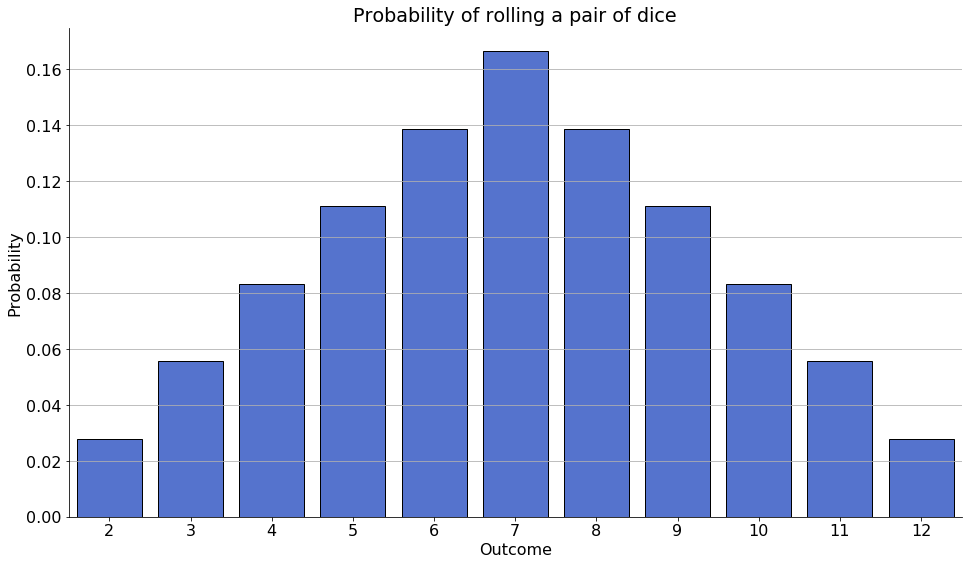

In [11]:
# Answer:
print("It's normally distributed!")

# Chart the data from `dice_probability`
sns.barplot(
    y=dice_probability.probability,
    x=dice_probability.index,
    color='Royalblue'
)

# Add labels and format the chart
plt.title('Probability of rolling a pair of dice')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(axis='y');

## 2.
>Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

In [12]:
# This is a Uniform Distribution
# Using `stats.randint` to simulate a six-sided die
# `stats.randint` generates random discrete values in a given range. 
# Each number, 1-6 has an equally likely chance of occurring.

# The `.randint` method is not inclusive so the stop needs to be 1 + max discrete value.
# The `.rvs` method allows us to generate random values from our uniform distribution.
# Use the shape 10,000, 6 to generate 10,000 trials of 6 rolls - repeat for second die.
# Add both die together to get a pair of dice.
die_1 = stats.randint(1, 7).rvs(size=(10_000, 6))
die_2 = stats.randint(1, 7).rvs(size=(10_000, 6))
dice = die_1 + die_2

## 3a.
Plot the distribution of the calculated averages.

> What do you notice about the shape of the distribution of calculated averages?

### Rolling a pair of dice

It's a Normal Distribution!


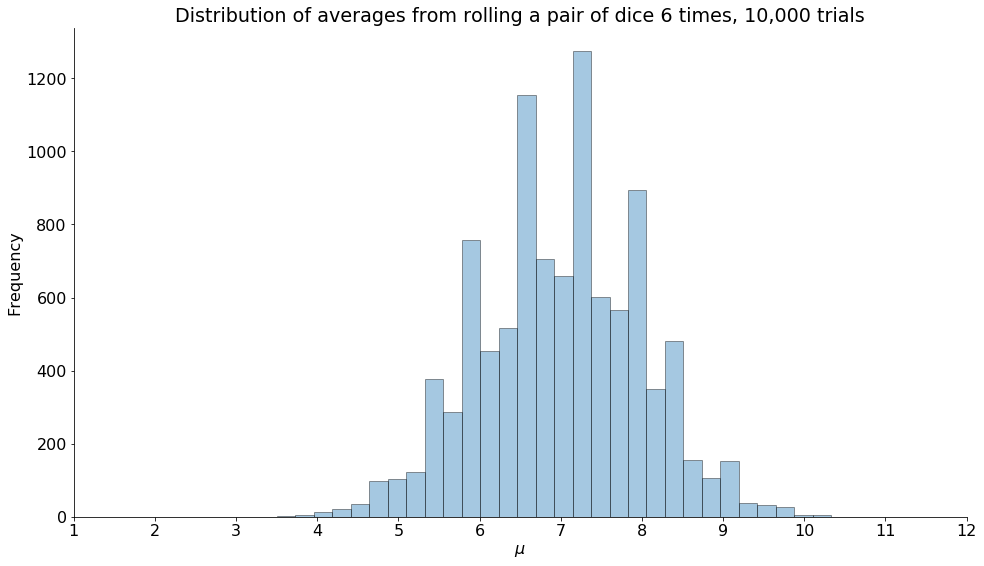

In [13]:
# Calculate the mean of each trial
average = dice.mean(axis=1)

# Extra:
# print("The average of 6 dice rolls in 10,000 trials is {:.2f}".format(
# dice.mean()))

# Answer:
print("It's a Normal Distribution!")

# Chart the mean of each trial as distribution
sns.distplot(average,
             bins=30,
             kde=False)

# Add chart labels to describe the data
plt.title("Distribution of averages from rolling a pair of dice 6 times, 10,000 trials")
plt.xlabel('$\mu$')
plt.ylabel('Frequency')

# Format the x-axis to explicitly show all outcomes
plt.xticks(np.linspace(1, 12, 12));

## 3b.
>What kind of distribution is the underlying random variable (i.e. one dice roll?)
### Rolling a die

In [14]:
# Create two seperate variables:
# One to simulate one die
# One to simulate 10,000 die rolls
die = stats.randint(1, 7)
die_roll = stats.randint(1, 7).rvs(10_000) # Simulate 10,000 die rolls

A Uniform Distribution!


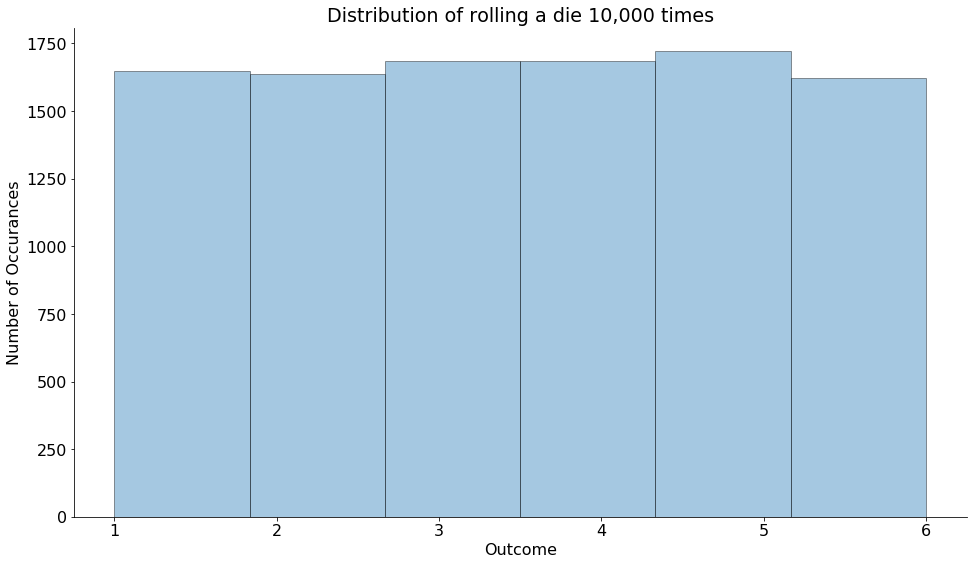

In [15]:
# Plot 10,000 dice rolls in a distribution. Set kde=False to remove kernel density estimate.
sns.distplot(die_roll, bins=6, kde=False)

# Extra:
# print("Expected average value of 10,000 die rolls is {:.3}".format(
# die_roll.mean()))

# Answer:
print("A Uniform Distribution!")

# Chart formatting to describe the data
plt.title('Distribution of rolling a die 10,000 times')
plt.xlabel('Outcome')
plt.ylabel('Number of Occurances');

The discrete values of a die roll have the same probability --- 16.67%
A Uniform Distribution!


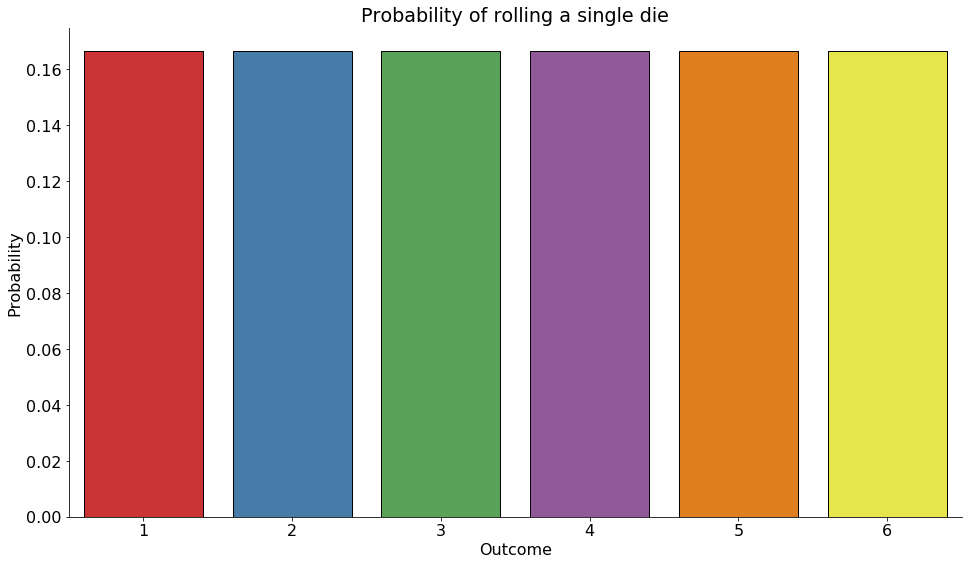

In [54]:
x=np.arange(1, 7)
die_probability = die.pmf(x)

print("The discrete values of a die roll have the same probability --- {:.2%}".format(
    die_probability.mean()
))

print("A Uniform Distribution!")

# Chart formatting
sns.barplot(y=die_probability, x=x, palette="Set1")
plt.title('Probability of rolling a single die')
# plt.grid(axis='y')

plt.xlabel('Outcome')
plt.ylabel('Probability');

# T-Test Exercises

## 1.
Ace Realty wants to determine whether the average time it takes to sell homes is different for _its two offices_.
> A sample of 40 sales from office #1 revealed a `mean` of 90 days and a `standard deviation` of 15 days.

> A sample of 50 sales from office #2 revealed a `mean` of 100 days and a `standard deviation` of 20 days.

> Use a .05 `level of significance`.

__Setup__:


$H{0}$: The average time to sell a home is the same for its two offices.

$H{1}$ The average time to sell a home is significantly different for its two offices.

$\alpha$ = 0.05

In [56]:
# The phrase 'average time' == average `rate`. Signal to define a Poisson Distribution
confidence_level = 0.95
alpha = 1 - confidence_level

# Office 1 data
o_1sample = 40
o_1mean = 90
o_1stdev = 15

# Office 2 data
o_2sample = 50
o_2mean = 100
o_2stdev = 20

# Model the Poisson Distribution of each office using its mean, standard deviation, and sample size
o_1 = stats.poisson(o_1mean, o_1stdev).rvs(o_1sample)
o_2 = stats.poisson(o_2mean, o_2stdev).rvs(o_2sample)

# When comparing two subgroups of a population, use a Two-Sample T-Test to compare their mean values
# `stats.ttest_ind(Subgroup1_Series_of_continuous_variables, Subgroup2_Series_of_continuous_variables)
t, p = stats.ttest_ind(o_1, o_2)

if p < alpha:
    print("Reject the Null Hypothesis: The average time to sell a home is the SAME for its two offices.")
    print("The average time to sell a home IS significantly different for its two offices.")

Reject the Null Hypothesis: The average time to sell a home is the SAME for its two offices.
The average time to sell a home IS significantly different for its two offices.


In [33]:
print("Office 1 mean sales:", o_1.mean())
print("Office 2 mean sales:", o_2.mean())
print("\nOffice 1 median sales:", np.median(o_1))
print("Office 2 median sales:", np.median(o_2))

Office 1 mean sales: 103.975
Office 2 mean sales: 119.36

Office 1 median sales: 104.0
Office 2 median sales: 118.0


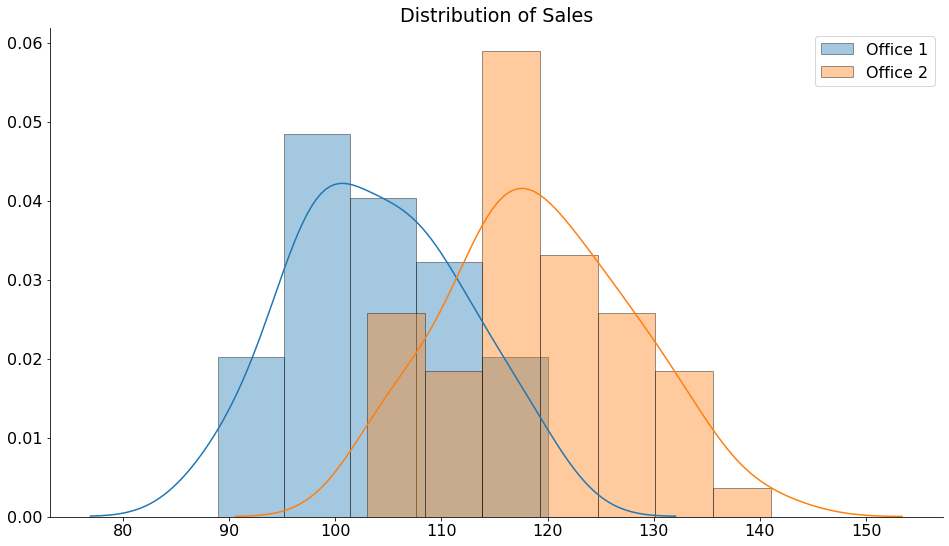

In [28]:
# Distributions of Office 1 and Office 2 Sales
sns.distplot(o_1, label='Office 1')
sns.distplot(o_2, label='Office 2')
plt.title("Distribution of Sales")
plt.legend();

## 2. 
Load the `mpg` dataset and use it to answer the following questions:

> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

\$H_{O}$ There is no difference in fuel-efficiency in cars from 2008 v. 1999.

\$H_{1}$ There is a difference in fuel-efficiency in cars from 2008 v. 1999.

In [58]:
from pydataset import data

In [59]:
df_mpg = data('mpg')

In [60]:
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [61]:
df_mpg['avg_mpg'] = (df_mpg.cty + df_mpg.hwy)/2

# Create car subgroups (2008, 1999) with continuous data (2008 avg_mpg, 1999 avg_mpg).
cars_08 = df_mpg[df_mpg.year == 2008].avg_mpg
cars_99 = df_mpg[df_mpg.year == 1999].avg_mpg

In [70]:
median_08 = np.median(cars_08)
median_99 = np.median(cars_99)
print("2008 Fuel_efficiency Median",median_08, "\n1999 Fuel_efficiency Median:",median_99)

2008 Fuel_efficiency Median 20.5 
1999 Fuel_efficiency Median: 21.0


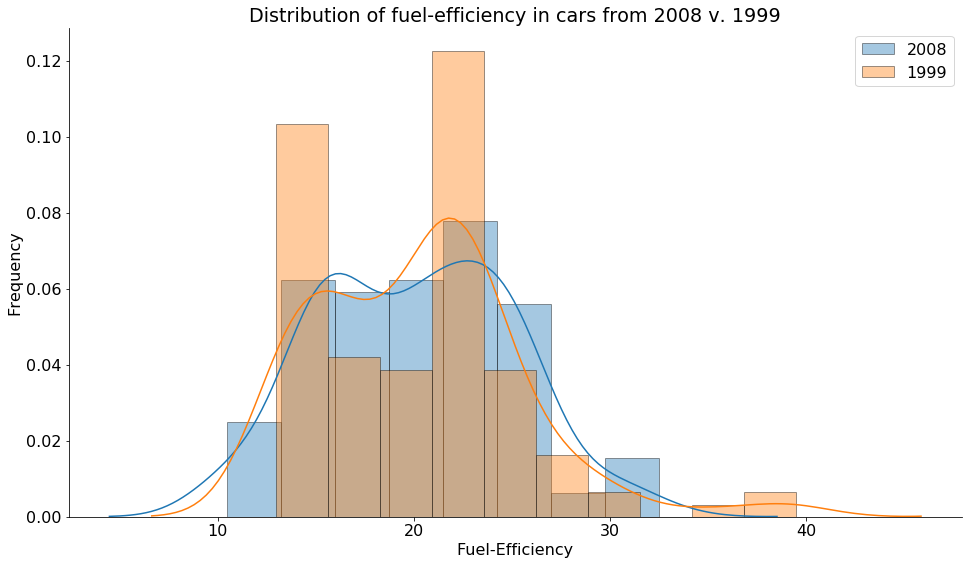

In [67]:
sns.distplot(cars_08, label='2008')
sns.distplot(cars_99, label='1999')

plt.title("Distribution of fuel-efficiency in cars from 2008 v. 1999")
plt.xlabel("Fuel-Efficiency")
plt.ylabel("Frequency")
plt.legend();

In [63]:
t, p = stats.ttest_ind(cars_08, cars_99)

In [73]:
if p < alpha:
    print('Reject $H_{O}$: There IS a difference in fuel-efficiency in cars from 2008 v. 1999.')
else:
    print('Fail to reject H0: There is NO difference in fuel-efficiency in cars from 2008 v. 1999.')

Fail to reject H0: There is NO difference in fuel-efficiency in cars from 2008 v. 1999.


> Are compact cars more fuel-efficient than the average car?

In [82]:
# We are comparing a subgroup mean against the mean of the population.
# df_mpg['class'].value_counts()
# ONE SAMPLE T-TEST
pop_mean = df_mpg.avg_mpg.mean()
compact_cars = df_mpg[df_mpg['class'] == 'compact'].avg_mpg

# 1 Sample Ttest
t, p = stats.ttest_1samp(compact_cars, pop_mean)

> Do manual cars get better gas mileage than automatic cars?

In [85]:
# Create a new column of formatted data
# df_mpg['trans_class'] = np.where()

In [ ]:
# TWO SAMPLE T-TEST



# Hypothesis Testing - Without Data

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

> Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## 1.
https://www.keycdn.com/support/what-is-latency

### Has the network latency gone up since we switched internet service providers?

__Null Hypothesis__: 

> \$H_{0}$ Internet service providers have no effect on network latency.

__Alternative Hypothesis__:

> \$Ha$ Internet service providers effect network latency.

__True Positive__: Internet service providers _do not_ effect network latency.
> Fail to reject the Null Hypothesis

__False Positive__: Internet service providers _do not_ effect network latency.
> Reject the Null Hypothesis

__Type I__:

> $\alpha$ Reject \$H_{0}$ when Internet service providers __do not__ effect network latency.

__Type II__: 

> $\beta$ Accept \$H_{0}$ when Internet service providers __do__ effect network latency.

## 2.
### Is the website redesign any good?

__Null Hypothesis__: 
> \$H_{0}$ The website redesign has no effect on the number of daily visitors.

__Alternative Hypothesis__:
> \$Ha$ The website redesign increased the number of daily visitors.

__True Positive__: The website redesign has no effect on the number of daily visitors.
> Fail to reject the Null Hypothesis

__False Positive__: The website redesign increased the number of daily visitors.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H_{0}$ when the website redesign has no effect on the number of daily visitors.

__Type II__: 
> $\beta$ Accept \$H_{0}$ when the website redesign increased the number of daily visitors.

## 3.
### Is our television ad driving more sales?

__Null Hypothesis__: 
> \$H_{0}$ The television ad had no effect on sales this month.

__Alternative Hypothesis__:

> \$Ha$ The television ad increased sales this month.

__True Positive__: The television ad had no effect on sales this month.
> Fail to reject the Null Hypothesis

__False Positive__: The television ad increased sales this month.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H_{0}$ when the television ad had no effect on sales this month.

__Type II__: 
>$\beta$ Accept \$H_{0}$ when the television ad increased sales this month.

# Correlation

## 1.
Use the `telco_churn` data.

In [25]:
df_telco = pd.read_excel('telco_churn.xlsx')

In [26]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
df_telco.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
# All telco data
tenure = df_telco.tenure
monthly_charge = df_telco.MonthlyCharges
total_charge = df_telco.TotalCharges

In [ ]:
# Internet Only Customers

## 1a.
> Does `tenure` correlate with `monthly charges`?

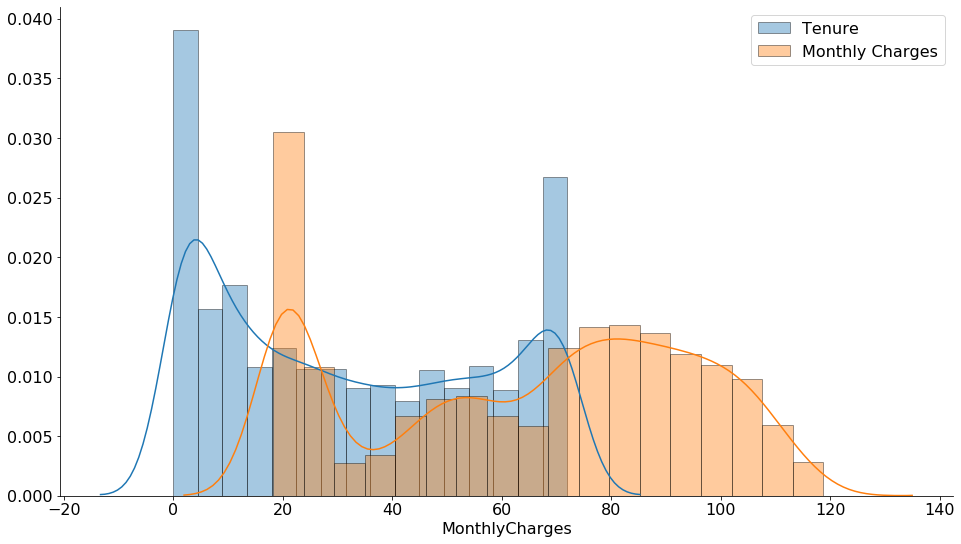

In [28]:
sns.distplot(tenure, label='Tenure')
sns.distplot(m_charge, label='Monthly Charges')
plt.legend();

In [29]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.MonthlyCharges)
print(f"The correlation between tenure and monthly charges is {r}")

The correlation between tenure and monthly charges is 0.24789985628615002


## 1b.
> `Total charges`?

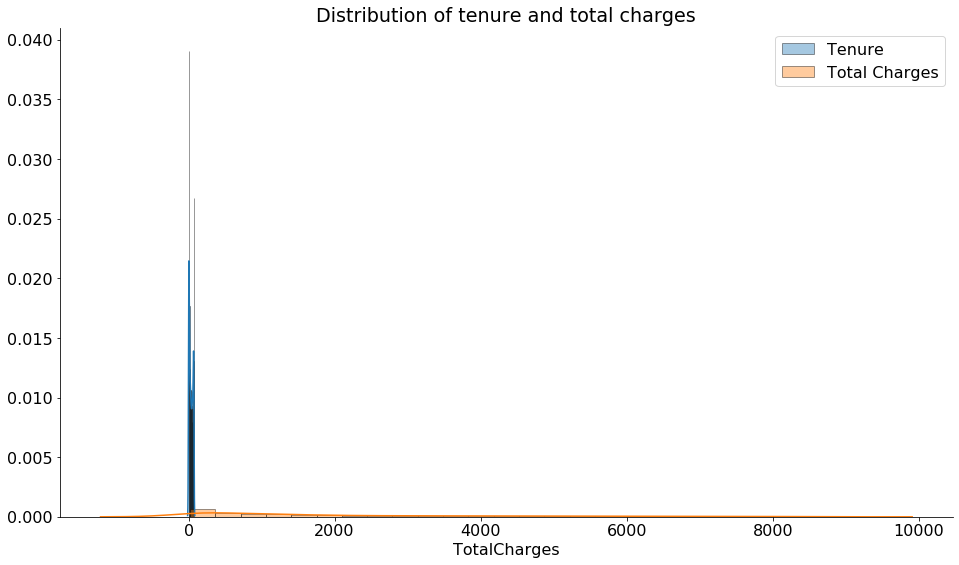

In [37]:
sns.distplot(tenure, label='Tenure')
sns.distplot(t_charge, label='Total Charges')
plt.title("Distribution of tenure and total charges")
plt.legend();

In [110]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.TotalCharges.fillna(0))
print(p)
print(f"The correlation between tenure and total charges is {r}")

0.0
The correlation between tenure and total charges is 0.8261783979502422


## 1c.
> What happens if you __control__ for `phone and internet service`?

### Phone Only

In [122]:
phone_only = df_telco[df_telco['InternetService'] == 'No']

# Phone Only Customers
phone_only_tenure = phone_only.tenure
phone_only_monthly_charge = phone_only.MonthlyCharges
phone_only_total_charge = phone_only.TotalCharges

In [123]:
r, p = stats.pearsonr(phone_only_tenure, phone_only_monthly_charge)

print(p)

print("Correlation between tenure and "\
      "monthly charges for phone only customers is {:.2f}".format(r))

3.356186955197392e-43
Correlation between tenure and monthly charges for phone only customers is 0.34


### Internet Only

In [103]:
internet_only = df_telco[df_telco['PhoneService'] != 'No']

# Internet Only Customers
internet_only_tenure = internet_only.tenure
internet_only_monthly_charge = internet_only.MonthlyCharges
internet_only_total_charge = internet_only.TotalCharges

In [104]:
r, p = stats.pearsonr(internet_only_tenure, internet_only_monthly_charge)

print(p)

print("Correlation between tenure and "\
      "monthly charges for internet only customers is {:.2f}".format(r))

7.117871077967264e-88
Correlation between tenure and monthly charges for internet only customers is 0.25


### Phone and Internet

In [107]:
# Phone and Internet Only Customers
bundled_telco = df_telco[
    (df_telco['PhoneService'] == 'Yes')
    &(df_telco['InternetService'] != 'Yes')
]

bundled_tenure = bundled_telco.tenure
bundled_monthly_charge = bundled_telco.MonthlyCharges
bundled_total_charge = bundled_telco.TotalCharges

In [108]:
r, p = stats.pearsonr(bundled_tenure, bundled_monthly_charge)

print(p)

print("Correlation between tenure and "\
      "monthly charges for phone and internet customers is {:.2f}".format(r))

7.117871077967264e-88
Correlation between tenure and monthly charges for phone and internet customers is 0.25


## 2.
Use the `employees` database.

In [125]:
# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
    
# df_emp_title_salaries = pd.read_sql("""
# select *
# from employees
# join salaries using(emp_no)
# join titles on titles.emp_no = employees.emp_no""",url)

# df_emp_title_salaries.to_csv('employees_salaries.csv')

In [ ]:
['s_from_date', 's_to_date']

In [143]:
columns = list(df_emp_title_salaries.columns[:-2])

> Is there a relationship between how long an employee has been with the company and their `salary`?

## 2a.
> Is there a relationship between how long an employee has been with the company and the number of `titles` they have had?

## 3.
Use the `sleepstudy` data. Is there a relationship between `days` and `reaction time`?

## Chi-Squared Hypothesis Testing

## 1.
> Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

## 2.
> Choose another 2 categorical variables from the `mpg` dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

## 3.
Use the data from the `employees` database to answer these questions:
## 3a.
> Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

## 3b.
> Is an employee's gender independent of whether or not they are or have been a manager?